In [1]:
## pandas best practices


In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
ri = pd.read_csv('Datasets/police.csv')

In [5]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [8]:
ri.shape

(91741, 15)

In [10]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [11]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [12]:
ri.isnull().sum(axis =1).head()

0    2
1    2
2    2
3    2
4    2
dtype: int64

In [13]:
## Remove the columns that contains missing values

In [14]:
ri.drop('county_name', axis = 1, inplace = True)

In [15]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [16]:
ri.shape

(91741, 14)

In [17]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [18]:
## do men or women speed more often
## driver_gender , vialotion

In [19]:
ri[ri.violation == 'Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [20]:
## get the result in percentage
ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize = True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [21]:
## how often a man is pulled over its speeding


In [23]:
ri[ri.driver_gender == "M"].violation.value_counts(normalize = True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [24]:
ri[ri.driver_gender == "F"].violation.value_counts(normalize = True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [25]:
## both the above codes in one line

In [26]:
ri.groupby('driver_gender').violation.value_counts(normalize = True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [27]:
ri.groupby('driver_gender').violation.value_counts(normalize = True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


In [28]:
## does gender effect who gets searched
## driver_gender, search_conducted

In [30]:
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [31]:
ri.search_conducted.mean()

0.03483720473942948

In [32]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [33]:
## group by 2 columns
## what cause search_conducted -- what is the underlying reason

In [35]:
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [36]:
ri.isna().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [37]:
##  why search_type has 88545 missing value


In [38]:
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [39]:
## because search was not conducted 88545 times, 

In [40]:
ri.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonable Suspicion                         11
Inventory,Protective Fris

In [41]:
## recheck above condition

In [43]:
ri[ri.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

In [44]:
## it return a empty string

In [47]:
ri[ri.search_conducted == False].search_type.value_counts(dropna= False)

NaN    88545
Name: search_type, dtype: int64

In [48]:
## during a search how often a driver is frisked

In [49]:
## pandas string method

In [52]:
ri['frisk'] =ri.search_type.str.contains('Protective Frisk').head()

In [53]:
ri['frisk'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: frisk, dtype: object

In [7]:
ri.search_conducted.mean()

0.03483720473942948

In [10]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [12]:
## females are searched at 0.02 % times
## males rae searched at 0.04% times
### does this proove gender gets searched

In [13]:
ri.groupby(['driver_gender', 'violation']).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.042622
               Moving violation       0.036205
               Other                  0.056522
               Registration/plates    0.066140
               Seat belt              0.012598
               Speeding               0.008720
M              Equipment              0.070081
               Moving violation       0.059831
               Other                  0.047146
               Registration/plates    0.110376
               Seat belt              0.037980
               Speeding               0.024925
Name: search_conducted, dtype: float64

In [15]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [16]:
## why is search type missing so much
## theory says - search conducted was false

In [17]:
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [18]:
ri.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Invent

In [19]:
ri[ri.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

In [21]:
## why is the above code throwing a empty series
## By default dropna is true, w have to make it false

In [23]:
ri[ri.search_conducted == False].search_type.value_counts(dropna = False)

NaN    88545
Name: search_type, dtype: int64

In [24]:
## during a search how oftena diver is frisked

In [25]:
## here we will go with pandas string methods

In [27]:
ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [28]:
ri.frisk.value_counts()

False    2922
True      274
Name: frisk, dtype: int64

In [29]:
ri.frisk.value_counts(dropna = False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [30]:
ri.frisk.sum()

274

In [31]:
ri.frisk.mean()

0.08573216520650813

In [32]:
## 6 . which year had the least no. of stops

In [39]:
ri.stop_date.head()

0    2005-01-02
1    2005-01-18
2    2005-01-23
3    2005-02-20
4    2005-03-14
Name: stop_date, dtype: object

In [37]:
ri.stop_date.str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [40]:
## we must combile two coluns

In [6]:
combined  = ri.stop_date.str.cat(ri.stop_time, sep = ' ')

In [7]:
combined.head()

0    2005-01-02 01:55
1    2005-01-18 08:15
2    2005-01-23 23:15
3    2005-02-20 17:15
4    2005-03-14 10:00
Name: stop_date, dtype: object

In [47]:
## convert "combined" to date time object

In [8]:
ri['stop_date_time']= pd.to_datetime(combined)

In [9]:
ri.dtypes

stop_date                     object
stop_time                     object
county_name                  float64
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
stop_date_time        datetime64[ns]
dtype: object

In [50]:
## how to get year from dateTime

In [52]:
ri.stop_date_time.dt.year.head()

0    2005
1    2005
2    2005
3    2005
4    2005
Name: stop_date_time, dtype: int64

In [56]:
ri.stop_date_time.dt.weekday.value_counts()

5    14204
0    13237
6    13202
4    13164
1    12929
2    12549
3    12456
Name: stop_date_time, dtype: int64

In [58]:
ri.stop_date_time.dt.year.value_counts().sort_values().index[3]

2013

## plotting time series

## 7. How does drug activity change bt time of day 

In [19]:
ri.groupby(ri.stop_date_time.dt.hour).drugs_related_stop.mean()

stop_date_time
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

In [11]:
ri.drugs_related_stop.mean()

0.008883705213590434

In [15]:
## create a seperate column for hours, and then apply value counts

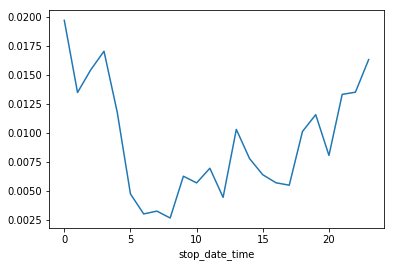

In [21]:
ri.groupby(ri.stop_date_time.dt.hour).drugs_related_stop.mean().plot()

## do most stops occur at night

In [27]:
ri.stop_date_time.dt.hour.value_counts().sort_index()

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_date_time, dtype: int64

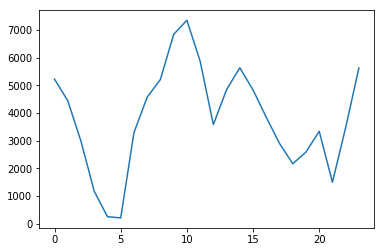

In [28]:
ri.stop_date_time.dt.hour.value_counts().sort_index().plot()

## find bad data in stop duration column and fix it

In [35]:
ri.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [33]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
stop_date_time            0
dtype: int64

In [36]:
## replace it by something else